In [ ]:
from google.colab import drive

drive.mount('/content/drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/ML homework/Copy of default of credit card clients.csv")

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
data.drop("ID", axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


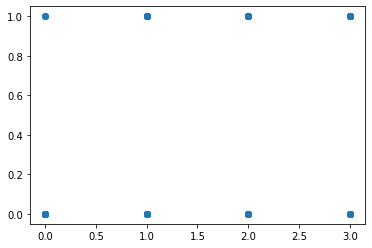

In [ ]:
plt.scatter(data['MARRIAGE'],data["default payment next month"] ,alpha=0.5)

In [ ]:
# Masks
mask_pay = data["default payment next month"] == 1 # payed
mask_miss = data["default payment next month"] == 0 # not payed
mask_married = data["MARRIAGE"] == 1 # married
mask_single = data["MARRIAGE"] == 2 #single
mask_men = data["SEX"] == 1 #single
mask_women = data["SEX"] == 2 #single

In [ ]:
def make_mask(mask1, mask2):
    result = []
    for m1, m2 in zip(mask1, mask2):
        result.append(m1 and m2)
    return result
#married - payed
married_payed = make_mask(mask_pay, mask_married)
married_miss = make_mask(mask_miss, mask_married)

#single - payed
single_payed = make_mask(mask_pay, mask_single)
single_miss = make_mask(mask_miss, mask_single)

#men - payed
men_payed = make_mask(mask_pay, mask_men)
men_miss = make_mask(mask_miss, mask_men)

#women - payed
women_payed = make_mask(mask_pay, mask_women)
women_miss = make_mask(mask_miss, mask_women)

#men - married - payed
men_married_payed = make_mask(mask_men, married_payed)
men_married_miss = make_mask(mask_men, married_miss)

#women - married - payed
women_married_payed = make_mask(mask_women, married_payed)
women_married_miss = make_mask(mask_women, married_miss)

In [ ]:
married_pay = data["default payment next month"][married_payed]
married_miss = data["default payment next month"][married_miss]

single_pay = data["default payment next month"][single_payed]
single_miss = data["default payment next month"][single_miss]

men_pay = data["default payment next month"][men_payed]
men_miss = data["default payment next month"][men_miss]

women_pay = data["default payment next month"][women_payed]
women_miss = data["default payment next month"][women_miss]

married_men_pay = data["default payment next month"][women_payed]
married_men_miss = data["default payment next month"][women_miss]

women_pay = data["default payment next month"][women_payed]
women_miss = data["default payment next month"][women_miss]

married_men_pay = data["default payment next month"][men_married_payed]
married_men_miss = data["default payment next month"][men_married_miss]

married_women_pay = data["default payment next month"][women_married_payed]
married_women_miss = data["default payment next month"][women_married_miss]

In [ ]:
print(f"The number of married people who payed there bill {len(married_pay)}\nand {len(married_miss)} who have missed there bills")

print(f"The number of single people who payed there bill {len(single_pay)}\nand {len(single_miss)} who have missed there bills")

print(f"The number of men who payed there bill {len(men_pay)}\nand {len(men_miss)} who have missed there bills")

print(f"The number of women who payed there bill {len(women_pay)}\nand {len(women_miss)} who have missed there bills")

print(f"The number of married women who payed there bill {len(married_women_pay)}\nand {len(married_women_miss)} who have missed there bills")

print(f"The number of married men who payed there bill {len(women_pay)}\nand {len(women_miss)} who have missed there bills")


The number of married people who payed there bill 3206
and 10453 who have missed there bills
The number of single people who payed there bill 3341
and 12623 who have missed there bills
The number of men who payed there bill 2873
and 9015 who have missed there bills
The number of women who payed there bill 3763
and 14349 who have missed there bills


It's quite obvious that many people tend to miss the bills, but single people tend to missed more than married people

# combination

In [ ]:
data["pay_history"] = data['PAY_0'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 

In [ ]:
data["pay_history"]

0       -2
1        3
2        0
3        0
4       -2
        ..
29995    0
29996   -4
29997    8
29998   -1
29999    0
Name: pay_history, Length: 30000, dtype: int64

In [ ]:
data['delay_amount'] = (data['BILL_AMT1'] - data['PAY_AMT1']) + (data['BILL_AMT2'] - data['PAY_AMT2']) + (data['BILL_AMT3'] - data['PAY_AMT3']) + (data['BILL_AMT4'] - data['PAY_AMT4']) + (data['BILL_AMT5'] - data['PAY_AMT5']) + (data['BILL_AMT6'] - data['PAY_AMT6'])

In [ ]:
data['delay_amount'] # need scaling

0          7015
1         12077
2         90635
3        222946
4         50290
          ...  
29995    682799
29996      6692
29997     39196
29998    119430
29999    222566
Name: delay_amount, Length: 30000, dtype: int64

In [ ]:
l_g = LogisticRegression(max_iter =1000)

In [ ]:
y = data["default payment next month"]
data = data.drop("default payment next month", axis=1)
x_train, x_test, y_train, y_test = train_test_split(data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_history']], y, test_size=0.2, random_state=42)#'LIMIT_BAL' 'delay_amount'

In [ ]:
l_g.fit(x_train, y_train)
prediction = l_g.predict(x_test)
# print("Confusion matrix",print_cm(confusion, ['Not pay', 'pay']))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test, prediction)))
print('Recall: {:.2f}'.format(recall_score(y_test, prediction)))
print('F1: {:.2f}'.format(f1_score(y_test, prediction)))
print(classification_report(y_test, prediction, target_names=['not pay', 'pay']))

Accuracy: 0.80
Precision: 0.68
Recall: 0.15
F1: 0.25
              precision    recall  f1-score   support

     not pay       0.81      0.98      0.88      4687
         pay       0.68      0.15      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.57      6000
weighted avg       0.78      0.80      0.75      6000

